# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sb.set(style="whitegrid")

<Figure size 1000x300 with 0 Axes>

In [4]:
address = '../../data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,(9)].values

### Using scipy to generate dendrograms

In [5]:
Z = linkage(X, 'ward')

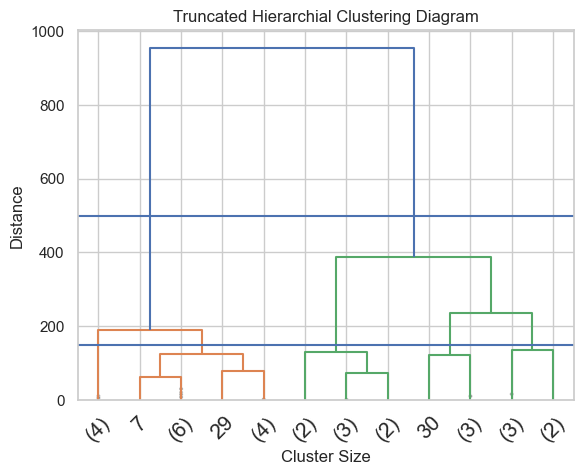

In [6]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [7]:

k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
Hclustering.fit(X)

accuracy = sm.accuracy_score(y, Hclustering.labels_)
print("Accuracy:", accuracy)

Accuracy: 0.78125


In [8]:
Hclustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='euclidean')
Hclustering.fit(X)

accuracy = sm.accuracy_score(y, Hclustering.labels_)
print("Accuracy:", accuracy)

Accuracy: 0.78125


In [9]:
Hclustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='manhattan')
Hclustering.fit(X)

accuracy = sm.accuracy_score(y, Hclustering.labels_)
print("Accuracy:", accuracy)

Accuracy: 0.71875


### Plot 

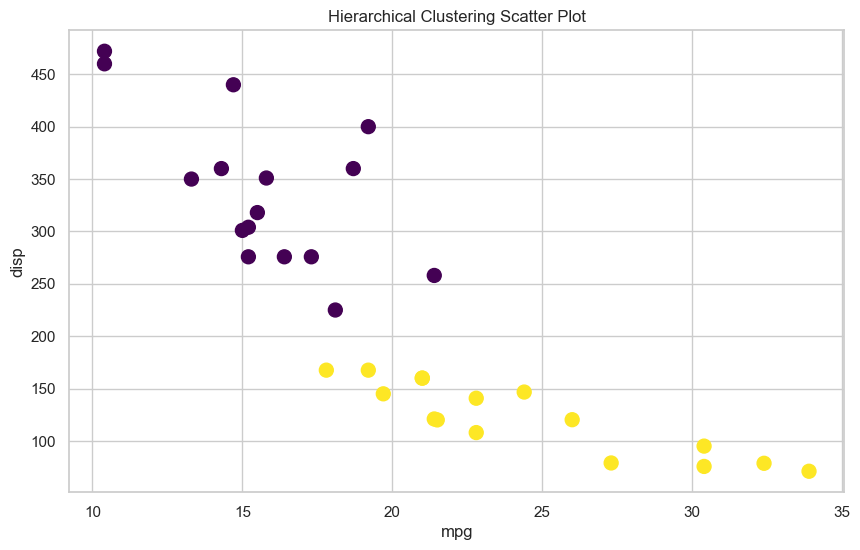

In [17]:
# Get cluster assignments from hierarchical clustering
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
clusters = clustering.fit_predict(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=100)
plt.title("Hierarchical Clustering Scatter Plot")
plt.xlabel("mpg")
plt.ylabel("disp")
plt.show()